## Assignment By:- Saakshi Srivastava

## Data Engineer Assignment:-

### For this assignment, you’ll be provided with a dataset of companies as a list of JSON objects. Each object holds relevant data for a company. The fields are described below:

tags: the domains company operates in

companyName: synonyms of the company

domainName: extracted from the company website’s URL.

companyDesc: a short description of the company's operations

fundingList: details regarding the company’s funding rounds

crunchbase_url: URL to the company’s Crunchbase page

employeeNumber: number of employees in the company at the time data was extracted

foundedDate: date the company was founded on

companyWebsite: URL to company’s website

domain_groups: listing out possible groups the company may belong to. (this is our internal classification, may not be accurate)

TYPE: another internal classification (for product, and service-based companies), may not be accurate

#### Given a company name (similar to ones present in companyName), return the close competitors of the company, using any of the fields (or combination of fields) from the dataset. For example, competitors of Swiggy would be Zomato, FoodPanda, DoorDash, etc. Since all of them operate in similar domains and offer similar services.

#### Given a domain (any one of the domains in ‘tags’ field), present the companies with the fastest, and the slowest growth (hint: it may be based on the fundingList, foundedDate, etc)

#### Present any insights from the data that you found interesting. (this exercise carries bonus points, but isn’t necessary

## I've divided this assignment into 4 parts:
1. Cleaning a missing value imputation
2. Finding competitors algorithm
3. Getting slowest and the fastest growing companies as per the domain
4. Using tableau to get some insights based on the companies

In [1]:
#Importing libraries to load the dataset
import json
import csv

In [2]:
import urllib.request
import chardet

def detect_encoding(data):
    """
    Detects the encoding of the given byte data using chardet.

    Args:
        data (bytes): The byte data to detect encoding for.

    Returns:
        The detected encoding as a dictionary with the 'encoding' key.
    """
    return chardet.detect(data)

rawdata = urllib.request.urlopen('https://drive.google.com/file/d/1SmVM3neMmnQ5pdW5Jr1i_av32rwgwabU/view').read()
encoding = detect_encoding(rawdata)
print(encoding)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#I had converted the json file to csv to make it easier and now I'm loading the file for further processes.
data=pd.read_csv("domaintags.csv")

In [5]:
data.head()

,_id/$oid,tags/0,tags/1,companyName,domainName,crunchbase_url,TYPE,UpdatedOn/$date,companyDesc,companyWebsite,...,tags/14,tags/15,tags/16,tags/17,tags/18,tags/19,tags/20,tags/21,tags/22,fundingList/8/leadInvestors/2
0,5d09dfd68501d21d7d729bb1,finance,insurance,21st century insurance,21st,https://www.crunchbase.com/organization/21st-c...,Product-based,2020-01-18T03:39:34.845Z,"since 1958, 21st century insurance has been de...",www.21st.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5d09dfd78501d21d7d729bbb,3d technology,NaN,3d networks,3dnetworks,https://www.crunchbase.com/organization/3d-net...,Product-based,2020-01-20T15:10:33.852Z,NaN,www.3dnetworks.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5d09dfd78501d21d7d729bbc,3d technology,augmented reality,3dphy,3dphy,https://www.crunchbase.com/organization/3dphy-...,Product-based,2020-01-16T11:44:30.116Z,3dphy provides a range of 3d virtual and augme...,www.3dphy.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5d09dfd78501d21d7d729bbe,android,enterprise software,3lm,3lm,https://www.crunchbase.com/organization/3lm?ut...,Product-based,2020-01-21T12:50:14.767Z,3lm has already signed deals to provide its te...,www.3lm.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5d09dfd78501d21d7d729bbf,automotive,electronics,3m,3m,https://www.crunchbase.com/organization/3m?utm...,Product-based,2020-01-17T17:56:53.792Z,3m operates as a diversified technology compan...,www.3m.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#The daatset contains 176 columns which is a big number
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Columns: 176 entries, _id/$oid to fundingList/8/leadInvestors/2
dtypes: float64(28), object(148)
memory usage: 10.0+ MB


In [7]:
#The dataset consists of 7462 rows.
data.shape

(7462, 176)

In [8]:
data.columns

Index(['_id/$oid', 'tags/0', 'tags/1', 'companyName', 'domainName',
       'crunchbase_url', 'TYPE', 'UpdatedOn/$date', 'companyDesc',
       'companyWebsite',
       ...
       'tags/14', 'tags/15', 'tags/16', 'tags/17', 'tags/18', 'tags/19',
       'tags/20', 'tags/21', 'tags/22', 'fundingList/8/leadInvestors/2'],
      dtype='object', length=176)

In [9]:
#Many columns have empty values.
data.isnull().sum()

_id/$oid                            0
tags/0                            116
tags/1                           1243
companyName                         0
domainName                          0
                                 ... 
tags/19                          7461
tags/20                          7461
tags/21                          7461
tags/22                          7461
fundingList/8/leadInvestors/2    7461
Length: 176, dtype: int64

In [10]:
data.describe()

,employeeNumber/max,employeeNumber/min,foundedDate/$date/$numberLong,domain_groups/Fintech/ Payments,domain_groups/Insurtech,fundingList/0/noOfInvestors,domain_groups/Developer Tools,domain_groups/Hardware,domain_groups/Automotive,domain_groups/Healthcare,...,domain_groups/Social Networking,domain_groups/Venture Capital,domain_groups/E-Commerce,fundingList/4/noOfInvestors,fundingList/5/noOfInvestors,fundingList/6/noOfInvestors,fundingList/7/noOfInvestors,fundingList/8/noOfInvestors,fundingList/9/noOfInvestors,fundingList/0/fundingDate/$date/$numberLong
count,6604.000000,6604.000000,1.021000e+03,634.000000,162.000000,1808.000000,143.000000,310.000000,137.000000,466.000000,...,47.000000,193.000000,307.000000,420.00000,296.000000,194.000000,133.000000,92.000000,67.000000,1.000000e+00
mean,2879.560872,536.351302,-1.599206e+12,0.817677,0.754944,2.298673,0.666960,0.718989,0.711899,0.811185,...,0.698052,0.770349,0.755408,2.97381,3.148649,2.835052,2.631579,3.673913,3.313433,-4.480920e+10
std,3979.534266,1227.953979,1.389107e+12,0.089529,0.081077,2.163581,0.056874,0.080721,0.081340,0.087860,...,0.078503,0.093617,0.075075,2.34735,2.806445,2.659153,2.333789,8.844330,2.413403,NaN
min,10.000000,0.000000,-1.123420e+13,0.600753,0.602922,1.000000,0.600037,0.601678,0.601594,0.601643,...,0.603195,0.601607,0.600451,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,-4.480920e+10
25%,50.000000,11.000000,-2.303560e+12,0.764126,0.697041,1.000000,0.624372,0.642816,0.645629,0.761584,...,0.636311,0.687818,0.705550,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,-4.480920e+10
50%,500.000000,51.000000,-1.293810e+12,0.836825,0.756442,1.000000,0.649371,0.709832,0.716509,0.841958,...,0.688745,0.770777,0.759341,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,-4.480920e+10
75%,5000.000000,501.000000,-5.048890e+11,0.887570,0.804991,3.000000,0.693253,0.785117,0.750219,0.872513,...,0.755952,0.855645,0.806139,4.00000,4.000000,4.000000,3.000000,4.000000,5.000000,-4.480920e+10
max,10001.000000,5001.000000,-2.646000e+09,0.977858,1.000000,18.000000,0.839006,0.903469,0.948151,0.977981,...,0.925705,0.952917,0.933216,15.00000,24.000000,18.000000,15.000000,85.000000,11.000000,-4.480920e+10


In [11]:
#This function calculates the percentage of missing values in each column of the input dataframe.

percent_missing_data = data.isnull().sum() * 100 / len(data)
percent_missing_data

_id/$oid                          0.000000
tags/0                            1.554543
tags/1                           16.657733
companyName                       0.000000
domainName                        0.000000
                                   ...    
tags/19                          99.986599
tags/20                          99.986599
tags/21                          99.986599
tags/22                          99.986599
fundingList/8/leadInvestors/2    99.986599
Length: 176, dtype: float64

In [12]:
#We're finding the columns which have more than 90% empty rows
percent_missing_data_delete=percent_missing_data[percent_missing_data>90]
percent_missing_data_delete

domain_groups/Fintech/ Payments    91.503618
domain_groups/Insurtech            97.829000
domain_groups/Developer Tools      98.083624
domain_groups/Hardware             95.845618
domain_groups/Automotive           98.164031
                                     ...    
tags/19                            99.986599
tags/20                            99.986599
tags/21                            99.986599
tags/22                            99.986599
fundingList/8/leadInvestors/2      99.986599
Length: 144, dtype: float64

In [13]:
#So we can see that out of 176 columns, 144 of them have more than 90% empty values and 155 have greater than 80% empty values.
#But since these columns are based on the tags, thus we won't be removing them.

In [14]:
len(percent_missing_data_delete)

144

In [15]:
#We're first working on the tags field and filling the empty values with nothing so that we can combine it later on
data["tags/0"].fillna("",inplace=True)
data["tags/1"].fillna("",inplace=True)
data["tags/2"].fillna("",inplace=True)
data["tags/3"].fillna("",inplace=True)
data["tags/4"].fillna("",inplace=True)
data["tags/5"].fillna("",inplace=True)
data["tags/6"].fillna("",inplace=True)
data["tags/7"].fillna("",inplace=True)

In [16]:
# Rather than having so many tags columns, I'm going to comine them into one in order to reduce the number of columns and also it would reduce the number of empty values in that comn.
data['tags'] = data[['tags/0','tags/1','tags/2','tags/3', 'tags/4','tags/5','tags/6','tags/7']].apply(lambda row: '_'.join([val for val in row if val]),axis=1) 

In [17]:
data['tags']=data['tags'].str.replace(r'_', ' ')

In [18]:
#Now we have a single column with all the tags
data['tags']

0                                       finance insurance
1                                           3d technology
2              3d technology augmented reality e-commerce
3                      android enterprise software mobile
4              automotive electronics enterprise software
                              ...                        
7457    business development digital marketing ios web...
7458    messaging mobile software telecommunications w...
7459                                    internet software
7460    advertising brand marketing e-commerce marketi...
7461                                        search engine
Name: tags, Length: 7462, dtype: object

In [19]:
data.drop(columns=['tags/0','tags/1','tags/2','tags/3', 'tags/4','tags/5','tags/6','tags/7'],inplace=True)
# Now in tags/3-7we have very less empty values as compared to earlier.

In [20]:
percent_missing_data_delete=percent_missing_data[percent_missing_data>97]
percent_missing_data_delete

domain_groups/Insurtech          97.829000
domain_groups/Developer Tools    98.083624
domain_groups/Automotive         98.164031
tags/8                           98.097025
domain_groups/Agrotech           99.423747
                                   ...    
tags/19                          99.986599
tags/20                          99.986599
tags/21                          99.986599
tags/22                          99.986599
fundingList/8/leadInvestors/2    99.986599
Length: 118, dtype: float64

In [21]:
# We're going the remove the columns which have more than 97% empty data
data.drop(columns=percent_missing_data_delete.index,inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id/$oid                         7462 non-null   object 
 1   companyName                      7462 non-null   object 
 2   domainName                       7462 non-null   object 
 3   crunchbase_url                   7462 non-null   object 
 4   TYPE                             6097 non-null   object 
 5   UpdatedOn/$date                  7428 non-null   object 
 6   companyDesc                      6247 non-null   object 
 7   companyWebsite                   7336 non-null   object 
 8   employeeNumber/max               6604 non-null   float64
 9   employeeNumber/min               6604 non-null   float64
 10  foundedDate/$date/$numberLong    1021 non-null   float64
 11  domain_groups/Fintech/ Payments  634 non-null    float64
 12  foundedDate         

In [23]:
# Now we have 50 major columns.
import regex as r

In [24]:
# We're going to use rstrip on founded date column because it has extra "T09:00:00.000Z" in the end which is not required
data['foundedDate'] = data['foundedDate'].str.replace(r'T09:00:00.000Z$', '')
data['fundingList/0/fundingDate/$date'] = data['fundingList/0/fundingDate/$date'].str.replace(r'T09:00:00.000Z$', '')
data['fundingList/1/fundingDate/$date'] = data['fundingList/1/fundingDate/$date'].str.replace(r'T09:00:00.000Z$', '')
data['fundingList/2/fundingDate/$date'] = data['fundingList/2/fundingDate/$date'].str.replace(r'T09:00:00.000Z$', '')
data['fundingList/3/fundingDate/$date'] = data['fundingList/3/fundingDate/$date'].str.replace(r'T09:00:00.000Z$', '')
data['fundingList/4/fundingDate/$date'] = data['fundingList/4/fundingDate/$date'].str.replace(r'T09:00:00.000Z$', '')
data['fundingList/5/fundingDate/$date'] = data['fundingList/5/fundingDate/$date'].str.replace(r'T09:00:00.000Z$', '')

In [25]:
# In a similar manner we're going to remove the timestamp part of Updated on columns because it is not required
data['UpdatedOn/$date'] = data['UpdatedOn/$date'].str.replace(r'T.*Z$', '')

In [26]:
data['UpdatedOn/$date']

0       2020-01-18
1       2020-01-20
2       2020-01-16
3       2020-01-21
4       2020-01-17
           ...    
7457    2020-02-17
7458    2020-02-17
7459    2020-02-17
7460    2020-02-17
7461    2020-02-17
Name: UpdatedOn/$date, Length: 7462, dtype: object

In [27]:
data['fundingList/0/fundingDate/$date'].isnull().sum()

5323

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id/$oid                         7462 non-null   object 
 1   companyName                      7462 non-null   object 
 2   domainName                       7462 non-null   object 
 3   crunchbase_url                   7462 non-null   object 
 4   TYPE                             6097 non-null   object 
 5   UpdatedOn/$date                  7428 non-null   object 
 6   companyDesc                      6247 non-null   object 
 7   companyWebsite                   7336 non-null   object 
 8   employeeNumber/max               6604 non-null   float64
 9   employeeNumber/min               6604 non-null   float64
 10  foundedDate/$date/$numberLong    1021 non-null   float64
 11  domain_groups/Fintech/ Payments  634 non-null    float64
 12  foundedDate         

In [29]:
#We're going to rename the columns to make it easier to access them
data = data.rename(columns={'domain_groups/Fintech/ Payments': 'fintech_payment', 'domain_groups/Hardware': 'hardware','domain_groups/Healthcare':'healthcare','domain_groups/Edtech':'edtech','domain_groups/Martech':'martech','domain_groups/E-Commerce':'ecommerce'})

In [30]:
# I'm not going to remove the second two company name columns because I'll use it to later on find the relevant names relevant to the insights.
data.loc[70:100,['companyName','companyName/1','companyName/2']]

,companyName,companyName/1,companyName/2
70,appus,NaN,NaN
71,100grams,NaN,NaN
72,360 partners,NaN,NaN
73,8kpc inc,NaN,NaN
74,9start,NaN,NaN
75,abbvie,NaN,NaN
76,absolutdata research analytics solutions,absolutdata research analytics,absolutdata analytics
77,active intelligence pte,activeai,NaN
78,actuant corporation,NaN,NaN
79,aditya brila groupgrasim industries,grasim,grasim industries


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id/$oid                         7462 non-null   object 
 1   companyName                      7462 non-null   object 
 2   domainName                       7462 non-null   object 
 3   crunchbase_url                   7462 non-null   object 
 4   TYPE                             6097 non-null   object 
 5   UpdatedOn/$date                  7428 non-null   object 
 6   companyDesc                      6247 non-null   object 
 7   companyWebsite                   7336 non-null   object 
 8   employeeNumber/max               6604 non-null   float64
 9   employeeNumber/min               6604 non-null   float64
 10  foundedDate/$date/$numberLong    1021 non-null   float64
 11  fintech_payment                  634 non-null    float64
 12  foundedDate         

In [32]:
#We'll form a new column named as domain_groups and we'll get the values that it stores later on based on the needs.
selected_cols = ['fintech_payment','hardware','healthcare','edtech','martech','ecommerce']
df_selected = data[selected_cols]

# define lambda function to get non-null column names as a space-separated string
get_non_null_cols = lambda row: ' '.join([col for col in df_selected.columns if not pd.isna(row[col])])

# apply the lambda function to each row using apply() method
df_selected['domain_groups'] = df_selected.apply(get_non_null_cols, axis=1)

data['domain_groups']=df_selected['domain_groups']

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id/$oid                         7462 non-null   object 
 1   companyName                      7462 non-null   object 
 2   domainName                       7462 non-null   object 
 3   crunchbase_url                   7462 non-null   object 
 4   TYPE                             6097 non-null   object 
 5   UpdatedOn/$date                  7428 non-null   object 
 6   companyDesc                      6247 non-null   object 
 7   companyWebsite                   7336 non-null   object 
 8   employeeNumber/max               6604 non-null   float64
 9   employeeNumber/min               6604 non-null   float64
 10  foundedDate/$date/$numberLong    1021 non-null   float64
 11  fintech_payment                  634 non-null    float64
 12  foundedDate         

In [34]:
#Now we're going to work on total money raised by a company field
data['funding_list_money_raised'] = data['fundingList/0/moneyRaised'].fillna(data['fundingList/1/moneyRaised']).fillna(data['fundingList/2/moneyRaised']).fillna(data['fundingList/3/moneyRaised']).fillna(data['fundingList/4/moneyRaised']).fillna(data["fundingList/5/moneyRaised"])

In [35]:
#Filling the minimum value so that it gets easier to compare them and exclude the None type argument
data['funding_list_money_raised']=data['funding_list_money_raised'].fillna('₹1.1K')

In [36]:
data.drop(["fundingList/0/moneyRaised","fundingList/1/moneyRaised","fundingList/2/moneyRaised","fundingList/3/moneyRaised","fundingList/4/moneyRaised","fundingList/5/moneyRaised"],axis=1,inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id/$oid                         7462 non-null   object 
 1   companyName                      7462 non-null   object 
 2   domainName                       7462 non-null   object 
 3   crunchbase_url                   7462 non-null   object 
 4   TYPE                             6097 non-null   object 
 5   UpdatedOn/$date                  7428 non-null   object 
 6   companyDesc                      6247 non-null   object 
 7   companyWebsite                   7336 non-null   object 
 8   employeeNumber/max               6604 non-null   float64
 9   employeeNumber/min               6604 non-null   float64
 10  foundedDate/$date/$numberLong    1021 non-null   float64
 11  fintech_payment                  634 non-null    float64
 12  foundedDate         

In [38]:
#Getting the type of funding that each company gets
data['funding_list_funding_type'] = data['fundingList/0/fundingType'].fillna(data['fundingList/1/fundingType']).fillna(data['fundingList/2/fundingType']).fillna(data['fundingList/3/fundingType']).fillna(data['fundingList/4/fundingType']).fillna(data["fundingList/5/fundingType"])

In [39]:
#As you can see I'm reducing the number of columns first and forming one column which depicts every other column
data.drop(["fundingList/0/fundingType",'fundingList/1/fundingType','fundingList/2/fundingType','fundingList/3/fundingType','fundingList/4/fundingType','fundingList/5/fundingType'],axis=1,inplace=True)

In [40]:
data.funding_list_funding_type.fillna('')

0                    
1                    
2       funding round
3          seed round
4                    
            ...      
7457                 
7458                 
7459                 
7460                 
7461                 
Name: funding_list_funding_type, Length: 7462, dtype: object

In [41]:
data['funding_list_leading_investors'] = data['fundingList/0/leadInvestors/0'].fillna(data['fundingList/1/leadInvestors/0']).fillna(data['fundingList/2/leadInvestors/0']).fillna(data['fundingList/3/leadInvestors/0']).fillna(data['fundingList/4/leadInvestors/0'])

In [42]:
data.drop(["fundingList/0/leadInvestors/0",'fundingList/1/leadInvestors/0','fundingList/2/leadInvestors/0','fundingList/3/leadInvestors/0','fundingList/4/leadInvestors/0'],axis=1,inplace=True)

In [43]:
#Though this column has many empty values, yet i perceive this column as useful for further use
data.funding_list_leading_investors.fillna("Not Found")

0       Not Found
1       Not Found
2       Not Found
3       Not Found
4       Not Found
          ...    
7457    Not Found
7458    Not Found
7459    Not Found
7460    Not Found
7461    Not Found
Name: funding_list_leading_investors, Length: 7462, dtype: object

In [44]:
data['funding_list_no_of_investors'] = data['fundingList/0/noOfInvestors']+data['fundingList/1/noOfInvestors']+data['fundingList/2/noOfInvestors']+data['fundingList/3/noOfInvestors']+data['fundingList/4/noOfInvestors']+data['fundingList/5/noOfInvestors']

In [45]:
data['funding_list_no_of_investors']=data['funding_list_no_of_investors'].fillna(0)
data['funding_list_no_of_investors']=data['funding_list_no_of_investors'].astype('int64')

In [46]:
data['funding_list_no_of_investors'].unique()

array([ 0, 20, 19, 24, 27, 12, 33, 36, 13, 26,  9, 14, 16, 22,  7, 30, 32,
       38, 29, 42, 11, 15, 46, 31,  8, 21, 10, 34, 43, 25, 17, 35, 23, 28,
       18, 39,  6, 37, 48], dtype=int64)

In [47]:
data.drop(['fundingList/0/noOfInvestors','fundingList/1/noOfInvestors','fundingList/2/noOfInvestors','fundingList/3/noOfInvestors','fundingList/4/noOfInvestors','fundingList/5/noOfInvestors'],axis=1,inplace=True)

In [48]:
#Importing the libraries for datetime formatting
from dateutil.relativedelta import relativedelta
from datetime import date

# get today's date
today = date.today()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id/$oid                         7462 non-null   object 
 1   companyName                      7462 non-null   object 
 2   domainName                       7462 non-null   object 
 3   crunchbase_url                   7462 non-null   object 
 4   TYPE                             6097 non-null   object 
 5   UpdatedOn/$date                  7428 non-null   object 
 6   companyDesc                      6247 non-null   object 
 7   companyWebsite                   7336 non-null   object 
 8   employeeNumber/max               6604 non-null   float64
 9   employeeNumber/min               6604 non-null   float64
 10  foundedDate/$date/$numberLong    1021 non-null   float64
 11  fintech_payment                  634 non-null    float64
 12  foundedDate         

#### I'm converting date columns to date and getting the total year values

In [50]:
data['fundingList/0/fundingDate/$date'] = pd.to_datetime(data['fundingList/0/fundingDate/$date'])
data['fundingList/1/fundingDate/$date'] = pd.to_datetime(data['fundingList/1/fundingDate/$date'])
data['fundingList/2/fundingDate/$date'] = pd.to_datetime(data['fundingList/2/fundingDate/$date'])
data['fundingList/3/fundingDate/$date'] = pd.to_datetime(data['fundingList/3/fundingDate/$date'])
data['fundingList/4/fundingDate/$date'] = pd.to_datetime(data['fundingList/4/fundingDate/$date'])
data['fundingList/5/fundingDate/$date'] = pd.to_datetime(data['fundingList/5/fundingDate/$date'])

In [51]:
data['fundingdate0']=(pd.to_datetime('now') - pd.to_datetime(data['fundingList/0/fundingDate/$date'])) / np.timedelta64(1, 'Y')
data['fundingdate1']=(pd.to_datetime('now') - pd.to_datetime(data['fundingList/1/fundingDate/$date'])) / np.timedelta64(1, 'Y')
data['fundingdate2']=(pd.to_datetime('now') - pd.to_datetime(data['fundingList/2/fundingDate/$date'])) / np.timedelta64(1, 'Y')
data['fundingdate3']=(pd.to_datetime('now') - pd.to_datetime(data['fundingList/3/fundingDate/$date'])) / np.timedelta64(1, 'Y')
data['fundingdate4']=(pd.to_datetime('now') - pd.to_datetime(data['fundingList/4/fundingDate/$date'])) / np.timedelta64(1, 'Y')
data['fundingdate5']=(pd.to_datetime('now') - pd.to_datetime(data['fundingList/5/fundingDate/$date'])) / np.timedelta64(1, 'Y')

In [52]:
data['funding_date']=data['fundingdate0'].fillna(data['fundingdate1']).fillna(data['fundingdate2']).fillna(data['fundingdate3']).fillna(data['fundingdate4']).fillna(data['fundingdate5'])

In [53]:
data.drop(['fundingList/0/fundingDate/$date','fundingList/1/fundingDate/$date','fundingList/2/fundingDate/$date','fundingList/3/fundingDate/$date','fundingList/4/fundingDate/$date','fundingList/5/fundingDate/$date','fundingdate0','fundingdate1','fundingdate2','fundingdate3','fundingdate4','fundingdate5'],axis=1,inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _id/$oid                        7462 non-null   object 
 1   companyName                     7462 non-null   object 
 2   domainName                      7462 non-null   object 
 3   crunchbase_url                  7462 non-null   object 
 4   TYPE                            6097 non-null   object 
 5   UpdatedOn/$date                 7428 non-null   object 
 6   companyDesc                     6247 non-null   object 
 7   companyWebsite                  7336 non-null   object 
 8   employeeNumber/max              6604 non-null   float64
 9   employeeNumber/min              6604 non-null   float64
 10  foundedDate/$date/$numberLong   1021 non-null   float64
 11  fintech_payment                 634 non-null    float64
 12  foundedDate                     55

In [55]:
#missing values in the 'companyWebsite', 'companyDesc', 'employeeNumber/max' and 'employeeNumber/min' columns of a DataFrame with specified values or median values. 

data['companyWebsite'].fillna("Not Found",inplace=True)
data['companyDesc'].fillna("Not Found",inplace=True)
data['employeeNumber/max'].fillna(int(data['employeeNumber/max'].median()),inplace=True)
data['employeeNumber/min'].fillna(int(data['employeeNumber/min'].median()),inplace=True)

In [56]:
data['funding_date']=round(data['funding_date'],2).fillna(0)

In [57]:
data['funding_date']

0        0.00
1        0.00
2        8.38
3       12.85
4        0.00
        ...  
7457     0.00
7458     0.00
7459     0.00
7460     0.00
7461     0.00
Name: funding_date, Length: 7462, dtype: float64

In [58]:
data["TYPE"].mode()

0    Product-based
Name: TYPE, dtype: object

In [59]:
data.foundedDate.fillna(today)

0       2023-05-07
1       2000-01-01
2       2014-11-03
3       2010-07-01
4       2023-05-07
           ...    
7457    2013-02-05
7458    2000-01-01
7459    2023-05-07
7460    1999-11-03
7461    2023-05-07
Name: foundedDate, Length: 7462, dtype: object

In [60]:
data["TYPE"].fillna("Product-based",inplace=True)

In [61]:
#Working on the founded date and getting the total no. of years it has been present

In [62]:
import datetime

In [63]:
data['foundedDate'] = pd.to_datetime(data['foundedDate'])

In [64]:
data['foundedDate'].fillna(data['foundedDate'].mean(), inplace=True)

In [65]:
data['foundedDate']= data['foundedDate'].dt.date

In [66]:
data['foundedDate']

0       2003-05-03
1       2000-01-01
2       2014-11-03
3       2010-07-01
4       2003-05-03
           ...    
7457    2013-02-05
7458    2000-01-01
7459    2003-05-03
7460    1999-11-03
7461    2003-05-03
Name: foundedDate, Length: 7462, dtype: object

In [67]:
data['FoundedYears'] = (pd.to_datetime('now') - pd.to_datetime(data['foundedDate'])) / np.timedelta64(1, 'Y')

In [68]:
#Rounding off the values to 2 decimal for better use
data['FoundedYears']=data['FoundedYears'].apply(lambda x: round(x,2))

In [69]:
data['FoundedYears']

0       20.01
1       23.35
2        8.51
3       12.85
4       20.01
        ...  
7457    10.25
7458    23.35
7459    20.01
7460    23.51
7461    20.01
Name: FoundedYears, Length: 7462, dtype: float64

## Now we've thoroughly cleaned the data and I'm going to create a new dataframe from the existing one for major columns and I'll use the data dataframe for getting more details when further needed

In [70]:
# New dataframe with accurate columns
df = pd.DataFrame().assign(company=data['companyName'], domain_name=data['domainName'],
                           c_url=data['crunchbase_url'],type_p_s=data['TYPE'],description=data['companyDesc'],
                           website=data["companyWebsite"],max_exmp=data['employeeNumber/max'],
                           min_emp=data['employeeNumber/min'],tags=data['tags'],domain=data['domain_groups'],
                           money_raised=data['funding_list_money_raised'],funding_type=data['funding_list_funding_type'],
                           lead_investor=data['funding_list_leading_investors'],
                           total_investor=data['funding_list_no_of_investors'],founded_years=data['FoundedYears'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         7462 non-null   object 
 1   domain_name     7462 non-null   object 
 2   c_url           7462 non-null   object 
 3   type_p_s        7462 non-null   object 
 4   description     7462 non-null   object 
 5   website         7462 non-null   object 
 6   max_exmp        7462 non-null   float64
 7   min_emp         7462 non-null   float64
 8   tags            7462 non-null   object 
 9   domain          7462 non-null   object 
 10  money_raised    7462 non-null   object 
 11  funding_type    2140 non-null   object 
 12  lead_investor   1483 non-null   object 
 13  total_investor  7462 non-null   int64  
 14  founded_years   7462 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 874.6+ KB


In [72]:
df['money_raised']=df.money_raised.fillna(0)
df['funding_type']=df.funding_type.fillna("Not Found")
df['lead_investor']=df['lead_investor'].fillna("None")

In [73]:
df.describe()

,max_exmp,min_emp,total_investor,founded_years
count,7462.000000,7462.000000,7462.000000,7462.000000
mean,2605.952828,480.544358,0.566202,20.012834
std,3819.919892,1165.522893,3.663079,9.573353
min,10.000000,0.000000,0.000000,3.280000
25%,100.000000,11.000000,0.000000,12.930000
50%,500.000000,51.000000,0.000000,20.010000
75%,5000.000000,501.000000,0.000000,23.350000
max,10001.000000,5001.000000,48.000000,53.350000


In [74]:
df.shape

(7462, 15)

In [75]:
df.head()

,company,domain_name,c_url,type_p_s,description,website,max_exmp,min_emp,tags,domain,money_raised,funding_type,lead_investor,total_investor,founded_years
0,21st century insurance,21st,https://www.crunchbase.com/organization/21st-c...,Product-based,"since 1958, 21st century insurance has been de...",www.21st.com,10000.0,5001.0,finance insurance,fintech_payment,₹1.1K,Not Found,None,0,20.01
1,3d networks,3dnetworks,https://www.crunchbase.com/organization/3d-net...,Product-based,Not Found,www.3dnetworks.com,500.0,51.0,3d technology,,₹1.1K,Not Found,None,0,23.35
2,3dphy,3dphy,https://www.crunchbase.com/organization/3dphy-...,Product-based,3dphy provides a range of 3d virtual and augme...,www.3dphy.com,50.0,11.0,3d technology augmented reality e-commerce,,₹13M,funding round,None,0,8.51
3,3lm,3lm,https://www.crunchbase.com/organization/3lm?ut...,Product-based,3lm has already signed deals to provide its te...,www.3lm.com,50.0,11.0,android enterprise software mobile,,$1.5M,seed round,None,0,12.85
4,3m,3m,https://www.crunchbase.com/organization/3m?utm...,Product-based,3m operates as a diversified technology compan...,www.3m.com,10001.0,0.0,automotive electronics enterprise software,hardware,₹1.1K,Not Found,None,0,20.01


# Major definition for the first question

In [76]:
 """
    Finds companies in the provided DataFrame that are the competitors of the given company.

    Args:
        df: A pandas DataFrame containing columns 'company', 'tags', 'max_exmp', 'founded_years', 'total_investor'.
        company_name: A string specifying the name of the company to find similar competitors for.

    Returns:
        A list of up to 5 company names that have similar tags to the specified company and satisfy the following conditions:
            - The company has at least 2 tags in common with the specified company.
            - The company has more employees than the specified company.
            - The company was founded later than the specified company.
            - The company has more investors than the specified company.
        If there are not enough companies that satisfy these conditions, then the function returns up to 2 companies that have at least 1 tag in common with the specified company and satisfy the other conditions.
        If there are no companies that satisfy these conditions, then the function returns an empty list.
    """

def has_similar_tags(df, company_name):
    if df[df['company'].str.contains(company_name)].empty:
        if df[df['domain_name'].str.contains(company_name)].empty:
            company_name = 'None'
        else:
            index = df['domain_name'].tolist().index(company_name)
            company_name = df.loc[index,'company']
    else:
        company_name = company_name
    company_tags = set(df[df['company'] == company_name]['tags'].iloc[0].split())
    company_employees = df[df['company'] == company_name]['max_exmp'].iloc[0]
    company_founded_year = df[df['company'] == company_name]['founded_years'].iloc[0]
    company_investors = df[df['company'] == company_name]['total_investor'].iloc[0]
    df['Similarity'] = df.apply(lambda x: len(set(x['tags'].split()) & company_tags) if x['company'] != company_name else 0, axis=1)
    df['Ranking Score'] = df.apply(lambda x: x['Similarity'] + (1 if x['max_exmp'] > company_employees else 0) + (1 if x['founded_years'] > company_founded_year else 0) + (1 if x['total_investor'] > company_investors else 0), axis=1)
    similar_companies = df[(df['Similarity'] > 0) & (df['max_exmp'] > company_employees) & (df['founded_years'] < company_founded_year) & (df['total_investor'] > company_investors)].sort_values(by='Ranking Score', ascending=False).head(5)['company']
    if len(similar_companies) < 2:
        similar_companies = df[(df['Similarity'] > 0) & (df['founded_years'] < company_founded_year) & (df['tags'].str.contains('|'.join(company_tags)))].sort_values(by=['Similarity', 'max_exmp'], ascending=[False, False])['company'].head(2)
    else:
        similar_companies = similar_companies.head(5)
    return similar_companies.tolist()

## Provide the company name in place of amobee that you want to search for

In [77]:
comp=input("Enter the company that you want to know the top competitors about: ")
print(has_similar_tags(df,comp))

Enter the company that you want to know the top competitors about: airbnb
['zostel', 'reddoorz']


In [78]:
df.head()

,company,domain_name,c_url,type_p_s,description,website,max_exmp,min_emp,tags,domain,money_raised,funding_type,lead_investor,total_investor,founded_years,Similarity,Ranking Score
0,21st century insurance,21st,https://www.crunchbase.com/organization/21st-c...,Product-based,"since 1958, 21st century insurance has been de...",www.21st.com,10000.0,5001.0,finance insurance,fintech_payment,₹1.1K,Not Found,None,0,20.01,0,2
1,3d networks,3dnetworks,https://www.crunchbase.com/organization/3d-net...,Product-based,Not Found,www.3dnetworks.com,500.0,51.0,3d technology,,₹1.1K,Not Found,None,0,23.35,0,1
2,3dphy,3dphy,https://www.crunchbase.com/organization/3dphy-...,Product-based,3dphy provides a range of 3d virtual and augme...,www.3dphy.com,50.0,11.0,3d technology augmented reality e-commerce,,₹13M,funding round,None,0,8.51,0,0
3,3lm,3lm,https://www.crunchbase.com/organization/3lm?ut...,Product-based,3lm has already signed deals to provide its te...,www.3lm.com,50.0,11.0,android enterprise software mobile,,$1.5M,seed round,None,0,12.85,0,0
4,3m,3m,https://www.crunchbase.com/organization/3m?utm...,Product-based,3m operates as a diversified technology compan...,www.3m.com,10001.0,0.0,automotive electronics enterprise software,hardware,₹1.1K,Not Found,None,0,20.01,0,2


In [79]:
currencies={'€', 'SGD', 'CN¥', 'ZAR', 'CA$', 'A$', '$', 'COP', '₹', '¥', '£', 'RUB', 'SEK', 'NOK', 'CHF'}
end_part={'K':1000,'M':1000000,'B':1000000000,'T':1000000000000}
currency_rates = {'ZAR': 5.14, 'RUB': 0.93, 'A$': 54.91, 'COP': 0.013, 'SEK': 8.27, 'CN¥': 10.04, '£': 98.97, 'NOK': 9.37, '$': 75.15, 'SGD': 55.56, '€': 89.67, '₹': 1, 'CA$': 62.34, 'CHF': 81.65, '¥': 11.63}

In [80]:
values=df['money_raised']

In [81]:
#r.findall(r'([^\d., ]+)', value) finds all non-numeric, non-period, non-comma, non-space characters in each string value 
#and stores them in the list currency_symbol.
#r.findall(r'\d+(?:\.\d+)?', value) finds all numeric characters in each string value and stores them in the list amount.
#endings is created by iterating through each value in values and appending the last character of each string to the list.

In [82]:
currency_symbols = []
amounts=[]
for value in values:
    currency_symbol = r.findall(r'([^\d., ]+)', value)
    if currency_symbol:
        currency_symbols.append(currency_symbol[0])
        
        
for value in values:
    amount=r.findall(r'\d+(?:\.\d+)?', value)
    if amount:
        amounts.append(amount[0])

endings = [value[-1] for value in values]

In [83]:
ending_part=[end_part[i] for i in endings]

In [84]:
currency_values = [currency_rates[c] for c in currency_symbols]

In [85]:
currency_values = [float(i) for i in currency_values]

In [86]:
amounts = [float(i) for i in amounts]

In [87]:
amount_part=[a * b for a, b in zip(currency_values, amounts)]

In [88]:
amount_part = [round(x, 2) for x in amount_part]

In [89]:
final_money_raised=[a*b for a,b in zip(ending_part,amount_part)]

In [90]:
#We've successfully gained the total money raised column as well now.
df['final_money_raised']=final_money_raised

In [91]:
df.funding_type.unique()

array(['Not Found', 'funding round', 'seed round', 'convertible note',
       'angel round', 'venture round', 'series a', 'post ipo equity',
       'secondary market', 'series b', 'corporate round', 'series e',
       'post ipo debt', 'private equity round', 'series d',
       'debt financing', 'pre seed round', 'post', 'series c',
       'non equity assistance', 'grant', 'series f',
       'seed round   cirtru roommate finder', 'initial coin offering',
       'series g', 'equity crowdfunding', 'post ipo secondary',
       'series h', 'post ipo equity   kolte', 'series j',
       'series b   peel', 'post ipo equity   saint',
       'private equity round   t',
       'venture round   ingenico healthcare/e',
       'venture round   bigstylist', 'non equity assistance   e',
       'series c   enterprise rent a', 'pre seed round   examtyari',
       'angel round   sacumen', 'grant   emory university', 'grant   scm'],
      dtype=object)

In [92]:
df.head()

,company,domain_name,c_url,type_p_s,description,website,max_exmp,min_emp,tags,domain,money_raised,funding_type,lead_investor,total_investor,founded_years,Similarity,Ranking Score,final_money_raised
0,21st century insurance,21st,https://www.crunchbase.com/organization/21st-c...,Product-based,"since 1958, 21st century insurance has been de...",www.21st.com,10000.0,5001.0,finance insurance,fintech_payment,₹1.1K,Not Found,None,0,20.01,0,2,1100.0
1,3d networks,3dnetworks,https://www.crunchbase.com/organization/3d-net...,Product-based,Not Found,www.3dnetworks.com,500.0,51.0,3d technology,,₹1.1K,Not Found,None,0,23.35,0,1,1100.0
2,3dphy,3dphy,https://www.crunchbase.com/organization/3dphy-...,Product-based,3dphy provides a range of 3d virtual and augme...,www.3dphy.com,50.0,11.0,3d technology augmented reality e-commerce,,₹13M,funding round,None,0,8.51,0,0,13000000.0
3,3lm,3lm,https://www.crunchbase.com/organization/3lm?ut...,Product-based,3lm has already signed deals to provide its te...,www.3lm.com,50.0,11.0,android enterprise software mobile,,$1.5M,seed round,None,0,12.85,0,0,112730000.0
4,3m,3m,https://www.crunchbase.com/organization/3m?utm...,Product-based,3m operates as a diversified technology compan...,www.3m.com,10001.0,0.0,automotive electronics enterprise software,hardware,₹1.1K,Not Found,None,0,20.01,0,2,1100.0


# Major definition for the second question

In [94]:
def company_growth(domain):    
    """
    This function takes a domain as input and returns the highest and slowest growth rate companies and their leading investors.
    
    Parameters:
    domain (str): The domain for which companies need to be searched.
    
    Returns:
    None
    """
    
    tag_data = df[df['tags'].str.contains(domain)]

    # calculate growth rate for each row
    tag_data['growth_rate'] = tag_data['final_money_raised'] / tag_data['founded_years']

    # sort rows based on growth rate in descending order
    tag_data = tag_data.sort_values(by='growth_rate', ascending=False)

    # get company with highest growth rate
    highest_growth_company = tag_data.iloc[0]['company']

    # get company with slowest growth rate
    slowest_growth_company = tag_data.iloc[-1]['company']
    highest_growth_investors = tag_data.iloc[0]['lead_investor']
    slowest_growth_investors = tag_data.iloc[-1]['lead_investor']

    print(f"Highest growth company in {domain_input}: {highest_growth_company}, with {highest_growth_investors} leading investors")
    print(f"Slowest growth company in {domain_input}: {slowest_growth_company}, with {slowest_growth_investors} leading investors")


## Enter the domain that you want the highest and the slowest company growth names.

In [95]:
domain_input=input("Enter the domain that you want to know the company with the highest and the slowest growth in: ")
company_growth(domain_input)

Enter the domain that you want to know the company with the highest and the slowest growth in: research
Highest growth company in research: qualtrics, with accel leading investors
Slowest growth company in research: millward brown, with None leading investors


## Finding some insights using tableau

In [96]:
df.to_csv('tableau_work_spottabl.csv',index=False)

### The below picture depicts that Indiafirst Life company has raised the highest amount of money=Rs. 533,570,000,000. And its lead investor is warburg pincus.
### With second one being apple with lead investor as berkshire hathaway

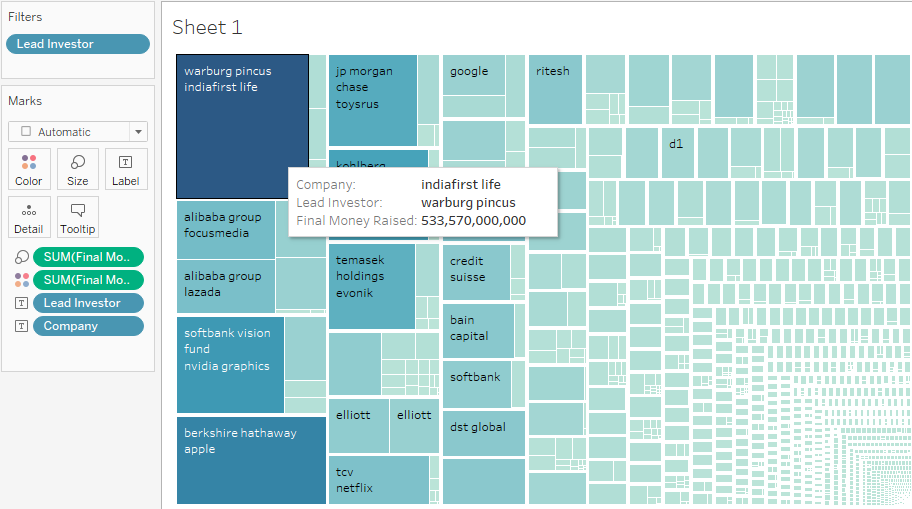

### In this visual we can see that (Post IPO Equity) funds had the max amount of money raised and venture round had the maximum number of investors, but is still on 4th number for money raised.

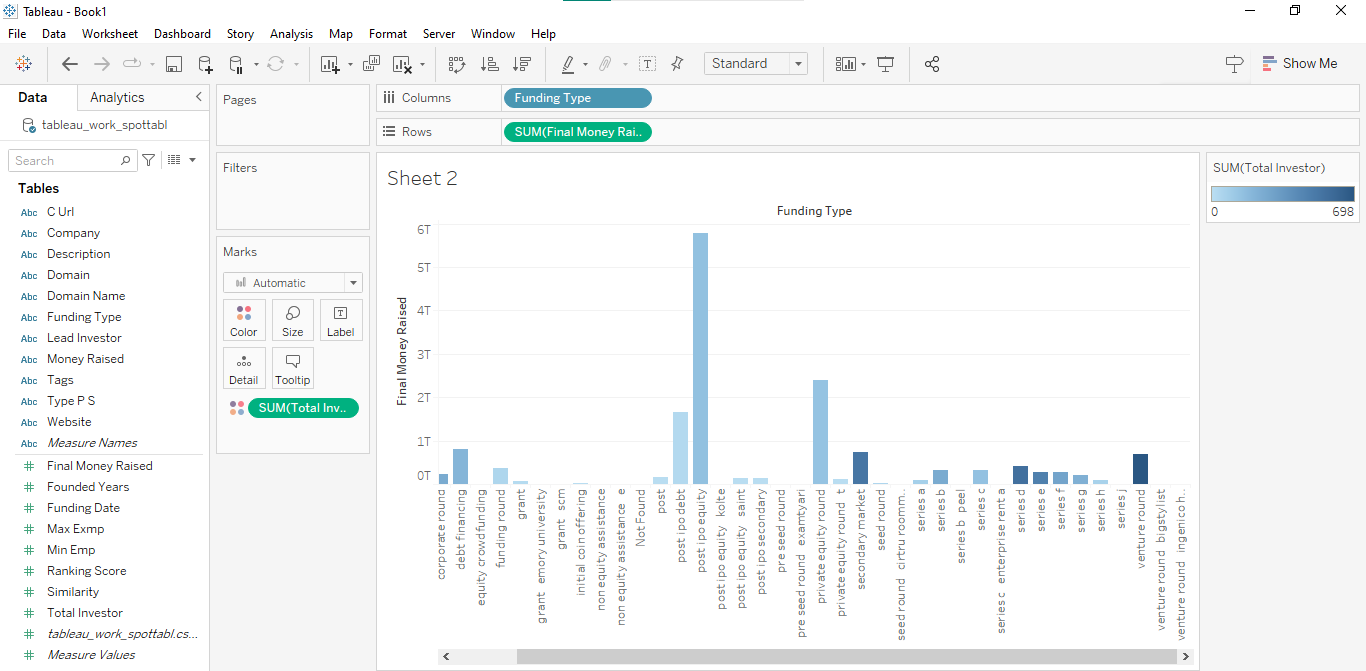

### Upon filtering the companies based on the averga emoney raised, arcs inc a xerox company totally is in the leading position. After which verizon labs is the second company

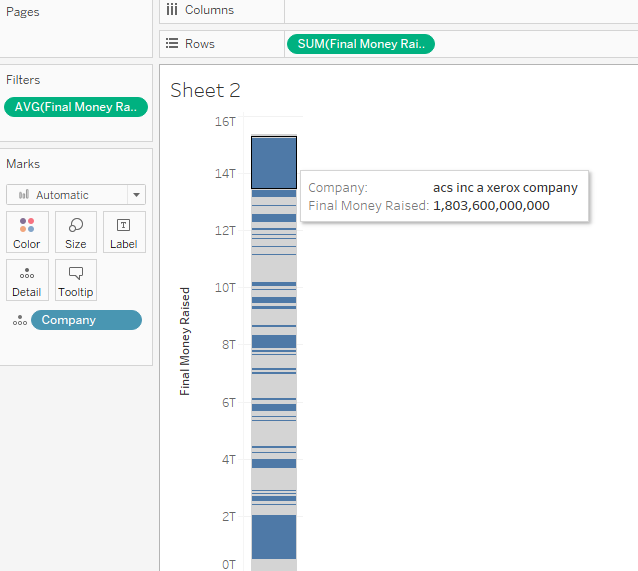

## After looking at the visuals of all companies, I'm able to see that mostly the companies in the second lower quartile have maximum number of investors, they are not recently founded but not old either.

### We can see that worldline global, western didgital are one of the oldest companies with atleast 10001 employees.

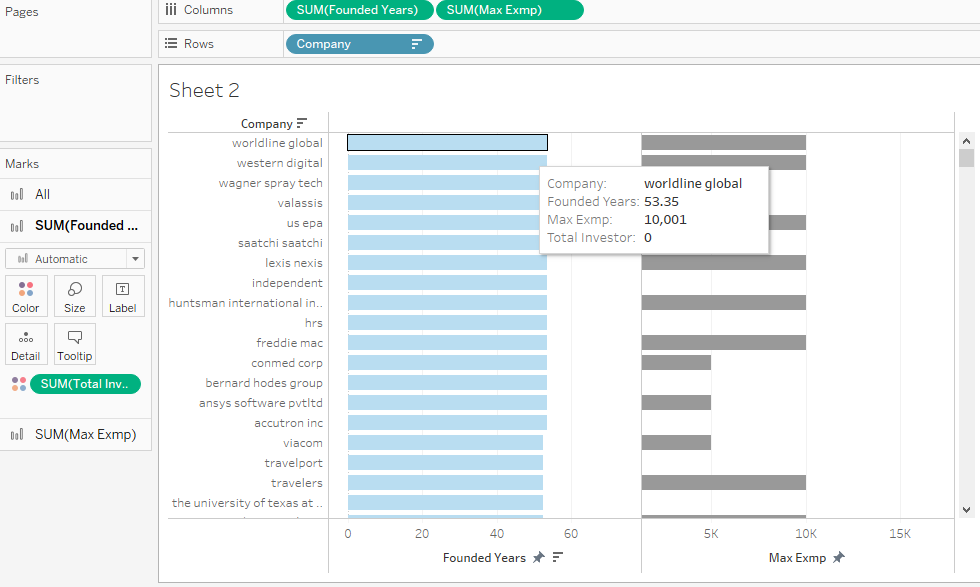

# Thank you very much for shortlisting me and for providing with this brainstorming assignment. Hoping to get your feedback on this assignment and find my spot in spottabl.